# Title: Predicting Heart Disease with Machine Learning Classification

### **Aim**: To build and assess various machine learning models for heart disease prediction using clinical and demographic data, and to determine the model with the best performance metrics. *italicized text*

Objective:

1. **Data Exploration and Preprocessing**: Conduct data exploration to understand the dataset features, followed by preprocessing steps, such as encoding categorical variables, imputing missing values, and scaling numerical features to prepare the data for model training.

2. **Model Training and Evaluation**: Train a range of classification models, including Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Random Forest, and Support Vector Machine (SVM). Evaluate each model using metrics like accuracy, precision, recall, F1-score, sensitivity, and specificity.

3. **Model Comparison**: Assess and compare the performance of each model based on evaluation metrics and ROC-AUC scores to identify the most accurate and dependable model for heart disease prediction.

4. **Visualization**: Visually present model comparisons with metrics plots, ROC-AUC curves, and confusion matrices to illustrate each model's predictive effectiveness.

## **Importing libraries**

In [118]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


## **Importing dataset**

In [7]:
dataset = pd.read_csv('/content/Heart.csv')

## **Pre-Processing & EDA**

In [8]:
dataset.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [9]:
dataset.tail()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [10]:
dataset.shape

(303, 15)

In [11]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [13]:
dataset.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [15]:
pd.isnull(dataset).sum()


,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


## **--------------------------------------------------------------------------------**

In [17]:
# Load the dataset
df = pd.read_csv('/content/Heart.csv')
# Categorical and numerical columns
categorical_cols = ['ChestPain'] # Correct column name
# Drop 'Unnamed: 0' and 'AHD' before selecting numerical columns
numerical_cols = df.drop(columns=['Unnamed: 0', 'AHD']).select_dtypes(include=['number']).columns
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit the encoder on the categorical column and transform it
encoded_data = encoder.fit_transform(df[categorical_cols])
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenate the encoded features with the numerical features
# Resetting index to avoid potential misalignment issues
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['AHD'] # Target column
# Impute missing values using SimpleImputer
# Using 'mean' strategy to replace NaNs with the mean of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X) # Applying imputer to the feature matrix X
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=2000) # Increased max_iter for convergence
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy}")

Accuracy: 83.60655737704919


### **CLASSIFICATION REPORT**

Classification Report:
               precision    recall  f1-score   support

      No AHD       0.77      0.83      0.80        29
         AHD       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
 [[24  5]
 [ 7 25]]
Sensitivity (Recall): 78.12%
Specificity: 82.76%


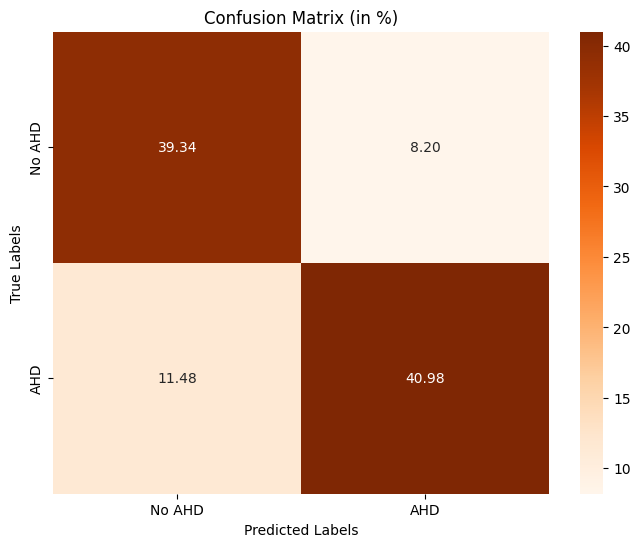

In [80]:
# Calculate the classification report
report = classification_report(y_test, y_pred, target_names=['No AHD', 'AHD'])
print("Classification Report:\n", report)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Calculate the total number of predictions to convert values to percentages
total_predictions = conf_matrix.sum()
conf_matrix_percent = conf_matrix / total_predictions * 100
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate Sensitivity (Recall) and Specificity in percentages
sensitivity = TP / (TP + FN) * 100 # True Positive Rate (TPR) in percentage
specificity = TN / (TN + FP) * 100 # True Negative Rate (TNR) in percentage
# Print Sensitivity (Recall) and Specificity in percentages
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
# Plot the confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Oranges", xticklabels=['No AHD', 'AHD'], yticklabels=['No AHD', 'AHD'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (in %)")
plt.show()

### **ROC AND AUC**

Accuracy: 83.61%


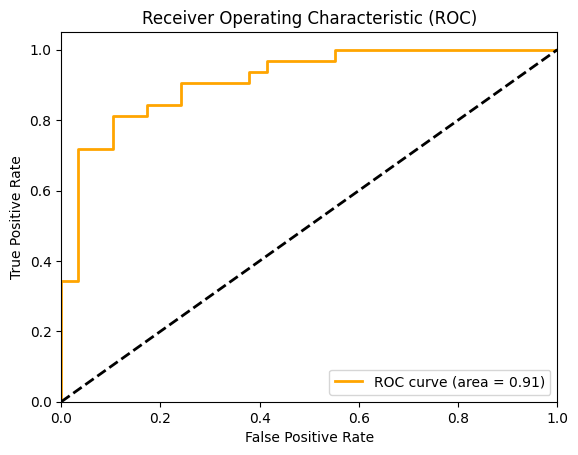

In [81]:
# Load the dataset
df = pd.read_csv('/content/Heart.csv')
# Encode the target variable (AHD) if it is in string format
label_encoder = LabelEncoder()
df['AHD'] = label_encoder.fit_transform(df['AHD']) # Converts 'Yes'/'No' to 1/0
# Categorical and numerical columns
categorical_cols = ['ChestPain']
numerical_cols = df.select_dtypes(include=['number']).columns.drop(['Unnamed: 0', 'AHD'])
# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenate the encoded features with the numerical features
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['AHD']
# Impute missing values in the numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
# Get predicted probabilities for the positive class (AHD)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## **K-Nearest Neighbor(KNN) Algorithm**

In [96]:
# Convert X_train and X_test back to DataFrames with appropriate column names
X_train = pd.DataFrame(X_train, columns=numerical_cols.tolist() + encoder.get_feature_names_out(categorical_cols).tolist())
X_test = pd.DataFrame(X_test, columns=numerical_cols.tolist() + encoder.get_feature_names_out(categorical_cols).tolist())
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])
# Concatenate the scaled numerical features with the encoded categorical features
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_cols).reset_index(drop=True),
 X_train.drop(columns=numerical_cols).reset_index(drop=True)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_cols).reset_index(drop=True),
 X_test.drop(columns=numerical_cols).reset_index(drop=True)], axis=1)
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors for optimization
knn.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_final)
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)*100
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 83.60655737704919


### **PERFORMANCE METRICS**

KNN Accuracy: 83.61%
KNN F1-score: 83.62%
KNN Precision: 83.80%
KNN Recall: 83.61%
KNN Sensitivity: 81.25%
KNN Specificity: 86.21%


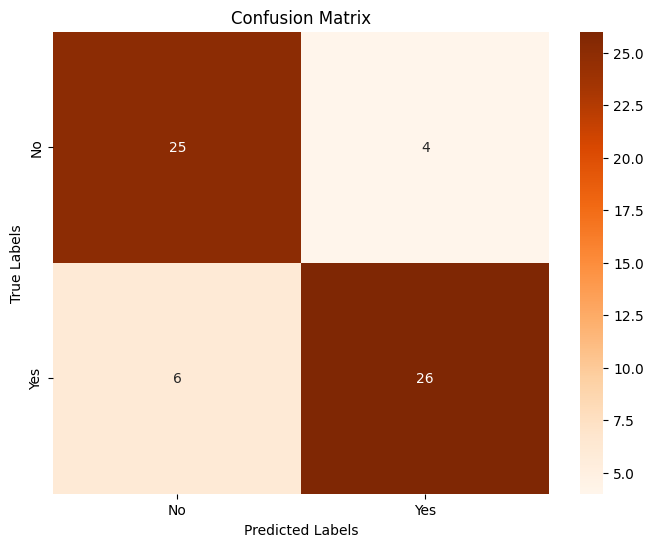

In [83]:
# Calculate F1-score, Precision, and Recall, converting them to percentages
f1 = f1_score(y_test, y_pred_knn, average='weighted') * 100
precision = precision_score(y_test, y_pred_knn, average='weighted') * 100
recall = recall_score(y_test, y_pred_knn, average='weighted') * 100
# Calculate confusion matrix to derive specificity and sensitivity
conf_matrix = confusion_matrix(y_test, y_pred_knn)
# Extract values for binary classification (if applicable)
tn, fp, fn, tp = conf_matrix.ravel()
# Calculate Sensitivity (Recall) and Specificity
sensitivity = (tp / (tp + fn)) * 100 # True Positive Rate for the positive class
specificity = (tn / (tn + fp)) * 100 # True Negative Rate
# Output all metrics as percentages
print(f"KNN Accuracy: {accuracy:.2f}%")
print(f"KNN F1-score: {f1:.2f}%")
print(f"KNN Precision: {precision:.2f}%")
print(f"KNN Recall: {recall:.2f}%")
print(f"KNN Sensitivity: {sensitivity:.2f}%")
print(f"KNN Specificity: {specificity:.2f}%")
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### **ROC AND AUC FOR KNN**

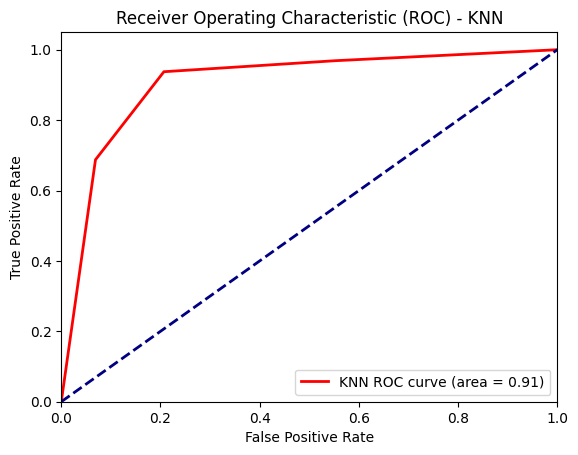

In [97]:
# Get predicted probabilities for the positive class (AHD) for KNN
y_pred_proba_knn = knn.predict_proba(X_test_final)[:, 1]

# Convert y_test to numerical labels (assuming 'Yes' is the positive class)
y_test_numeric = [1 if label == 'Yes' else 0 for label in y_test]

# Calculate the ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_numeric, y_pred_proba_knn)

# Calculate the AUC for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)
# Plot the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


## **Naive bayes Algorithm**

Accuracy: 80.33%
Classification Report:

No AHD - precision: 77.42%
No AHD - recall: 82.76%
No AHD - f1-score: 80.00%
No AHD - support: 2900.00%
AHD - precision: 83.33%
AHD - recall: 78.12%
AHD - f1-score: 80.65%
AHD - support: 3200.00%
accuracy: 80.33%
macro avg - precision: 80.38%
macro avg - recall: 80.44%
macro avg - f1-score: 80.32%
macro avg - support: 6100.00%
weighted avg - precision: 80.52%
weighted avg - recall: 80.33%
weighted avg - f1-score: 80.34%
weighted avg - support: 6100.00%

Confusion Matrix:
 [[24  5]
 [ 7 25]]

Sensitivity (Recall): 78.12%
Specificity: 82.76%


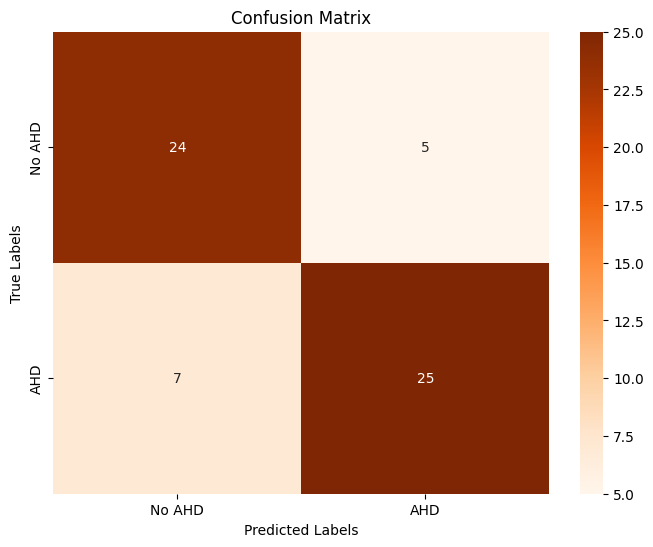

In [112]:
# Load the dataset
df = pd.read_csv('/content/Heart.csv')
# Check if 'AHD' and 'Unnamed: 0' columns exist, then exclude them from numerical columns
categorical_cols = ['ChestPain']
excluded_cols = ['Unnamed: 0', 'AHD']
# Ensure excluded columns are in DataFrame before dropping
numerical_cols = df.select_dtypes(include=['number']).columns.drop(
 [col for col in excluded_cols if col in df.columns], errors='ignore'
)
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenate the encoded features with the numerical features
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['AHD'] if 'AHD' in df.columns else None # Target column
# Check if 'AHD' is present before proceeding
if y is None:
 raise ValueError("Target column 'AHD' not found in the dataset.")
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
# Calculate the classification report
report = classification_report(y_test, y_pred, target_names=['No AHD', 'AHD'], output_dict=True)
print("Classification Report:\n")
for label, metrics in report.items():
  if isinstance(metrics, dict):
    for metric_name, value in metrics.items():
      print(f"{label} - {metric_name}: {value * 100:.2f}%")
  else:
    print(f"{label}: {metrics * 100:.2f}%")
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
# Calculate Sensitivity (Recall) and Specificity in percentage
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100
# Print Sensitivity (Recall) and Specificity
print(f"\nSensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
 xticklabels=['No AHD', 'AHD'], yticklabels=['No AHD', 'AHD'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

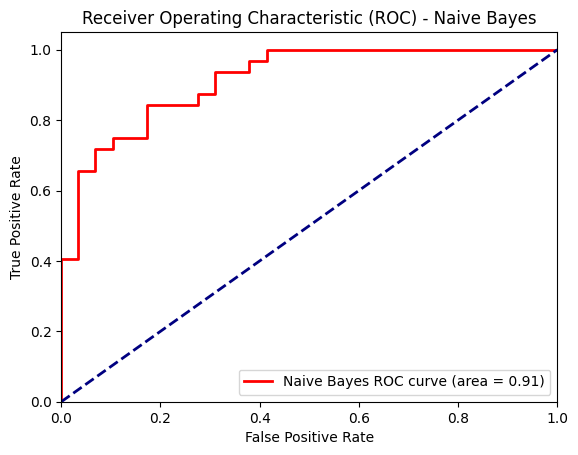

In [99]:
# Get predicted probabilities for the positive class (AHD) for Naive Bayes
y_pred_proba_nb = model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve for Naive Bayes
# Pass 'Yes' as the pos_label to roc_curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb, pos_label='Yes')
# Calculate the AUC for Naive Bayes
roc_auc_nb = auc(fpr_nb, tpr_nb)
# Plot the ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## **Support Vector Machine (SVM) Algorithm**

SVM Accuracy: 0.8525
SVM F1_score: 0.8523
SVM Precision: 0.8526
SVM Recall: 0.8525
SVM Sensitivity: 0.8750
SVM Specificity: 0.8276


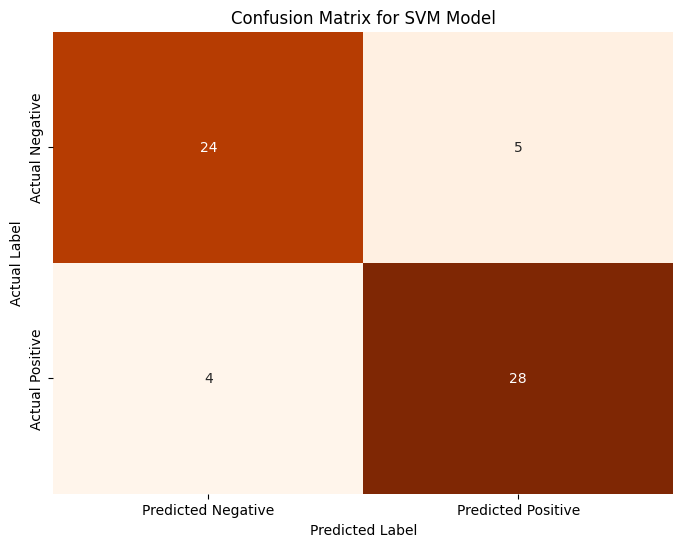

In [100]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, kernel='linear', C=1):
 # Create and train the SVM model
 svm_model = SVC(kernel=kernel, C=C)
 svm_model.fit(X_train, y_train)
 # Make predictions on the test set
 y_pred_svm = svm_model.predict(X_test)
 # Evaluate the SVM model
 metrics = {
 'accuracy': accuracy_score(y_test, y_pred_svm),
 'f1_score': f1_score(y_test, y_pred_svm, average='weighted'),
 'precision': precision_score(y_test, y_pred_svm, average='weighted'),
 'recall': recall_score(y_test, y_pred_svm, average='weighted'),
 }
 # Calculate confusion matrix for specificity and sensitivity
 tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
 metrics['sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
 metrics['specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
 return metrics, y_pred_svm
# Train and evaluate the SVM model
metrics_svm, y_pred_svm = train_and_evaluate_svm(X_train, y_train, X_test, y_test)
# Output all metrics
for metric, value in metrics_svm.items():
 print(f"SVM {metric.capitalize()}: {value:.4f}")
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
 xticklabels=['Predicted Negative', 'Predicted Positive'],
 yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## **RANDOM FOREST ALGORITHM**

Random Forest Accuracy: 0.8852
Random Forest F1_score: 0.8852
Random Forest Precision: 0.8895
Random Forest Recall: 0.8852
Random Forest Sensitivity: 0.8438
Random Forest Specificity: 0.9310


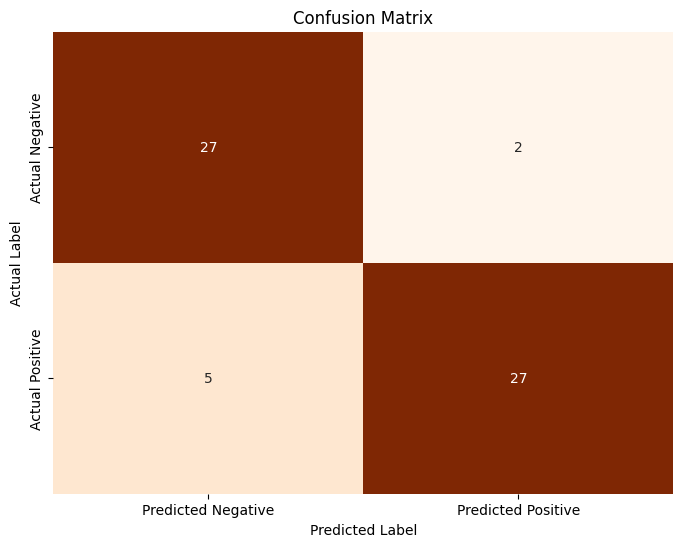

In [101]:
global rf_model
def train_and_evaluate_rf(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):
 # Create and train the Random Forest model
 global rf_model
 rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
 rf_model.fit(X_train, y_train)
 # Make predictions on the test set
 y_pred_rf = rf_model.predict(X_test)
 # Evaluate the Random Forest model
 metrics = {
 'accuracy': accuracy_score(y_test, y_pred_rf),
 'f1_score': f1_score(y_test, y_pred_rf, average='weighted'),
 'precision': precision_score(y_test, y_pred_rf, average='weighted'),
 'recall': recall_score(y_test, y_pred_rf, average='weighted'),
 }
 # Calculate confusion matrix for specificity and sensitivity
 tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
 metrics['sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
 metrics['specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
 return metrics, y_pred_rf
# Train and evaluate the Random Forest model
metrics_rf, y_pred_rf = train_and_evaluate_rf(X_train, y_train, X_test, y_test)
# Output all metrics
for metric, value in metrics_rf.items():
 print(f"Random Forest {metric.capitalize()}: {value:.4f}")
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
 xticklabels=['Predicted Negative', 'Predicted Positive'],
 yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


### **ROC AND AUC**

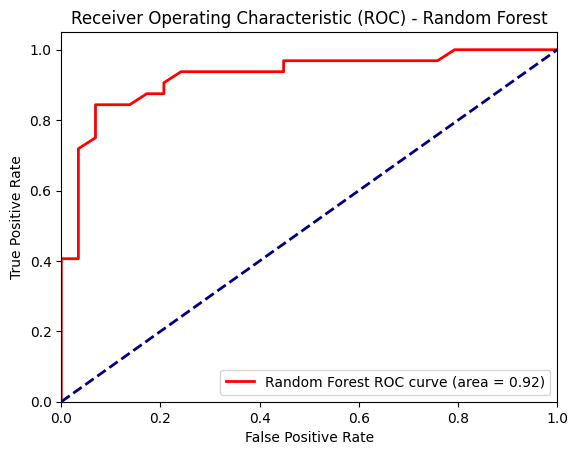

In [102]:
# Get predicted probabilities for the positive class (AHD) for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve for Random Forest
# Pass 'Yes' as the pos_label to roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf, pos_label='Yes')
# Calculate the AUC for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Plot the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

## **COMPARISON**

In [103]:

model_accuracies = {
 'Logistic Regression': accuracy,
 'KNN': accuracy_knn,
 'Naive Bayes': accuracy,
 'Random Forest': metrics_rf['accuracy'],
 'SVM': metrics_svm['accuracy'],
}
# Sort the models based on accuracy in descending order
sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)
# Print the sorted models with their accuracies
for model, accuracy in sorted_models:
 print(f"{model}: {accuracy}")

KNN: 83.60655737704919
Logistic Regression: 80.32786885245902
Naive Bayes: 80.32786885245902
Random Forest: 0.8852459016393442
SVM: 0.8524590163934426


### **ROC AND AUC**

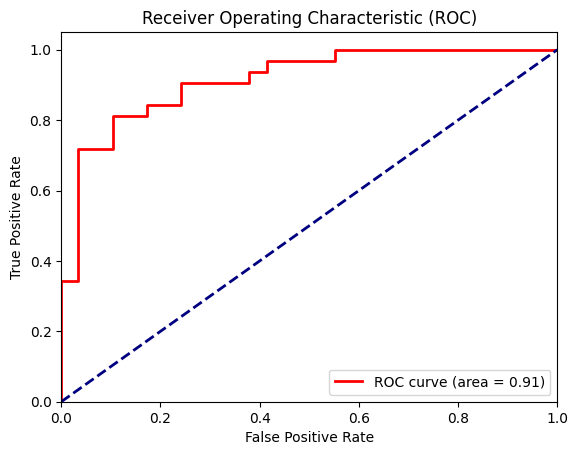

In [104]:
# Calculate the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes')
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### **HISTOGRAM**

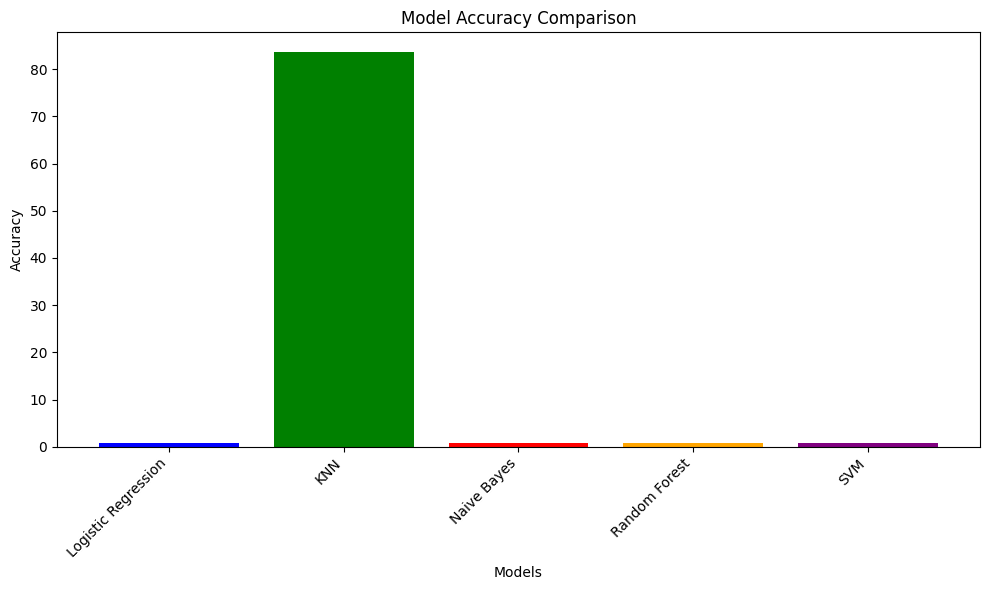

In [105]:
import matplotlib.pyplot as plt
# Assuming you have the accuracy scores from each model stored in a dictionary like:
model_accuracies = {
 'Logistic Regression': accuracy,
 'KNN': accuracy_knn,
 'Naive Bayes': accuracy,
 'Random Forest': metrics_rf['accuracy'],
 'SVM': metrics_svm['accuracy'],
}
# Extract model names and accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: AUC = 0.93
KNN: AUC = 0.91
Naive Bayes: AUC = 0.91
Random Forest: AUC = 0.92


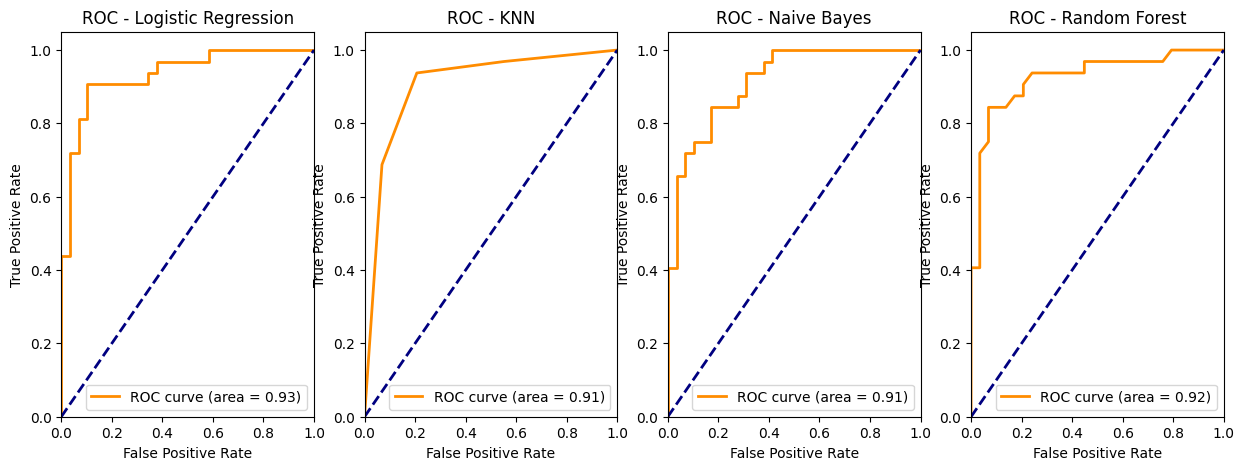

In [117]:
# Create a dictionary to store ROC curves and AUC scores
roc_data = {}
# Import the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train) # Assuming X_train and y_train are your training data

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_test_encoded = label_encoder.fit_transform(y_test)

# Logistic Regression
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Use the encoded y_test in roc_curve
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_data['Logistic Regression'] = (fpr_lr, tpr_lr, roc_auc_lr)

# Repeat the same encoding and roc_curve call for other models (KNN, Naive Bayes, Random Forest)

# KNN
y_pred_proba_knn = knn.predict_proba(X_test_final)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_encoded, y_pred_proba_knn) # Use encoded y_test
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_data['KNN'] = (fpr_knn, tpr_knn, roc_auc_knn)

# Naive Bayes
# Assuming you have a trained Naive Bayes model named 'nb_model'
y_pred_proba_nb = model.predict_proba(X_test)[:, 1]  # Replace 'nb_model' with your actual model variable name
fpr_nb, tpr_nb, _ = roc_curve(y_test_encoded, y_pred_proba_nb) # Use encoded y_test
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_data['Naive Bayes'] = (fpr_nb, tpr_nb, roc_auc_nb)

# Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, y_pred_proba_rf) # Use encoded y_test
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_data['Random Forest'] = (fpr_rf, tpr_rf, roc_auc_rf)


# Create a subplot for each model
fig, axes = plt.subplots(1, len(roc_data), figsize=(15, 5)) # Adjust the figure size as needed
for i, (model_name, (fpr, tpr, roc_auc)) in enumerate(roc_data.items()):
 axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
 axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 axes[i].set_xlim([0.0, 1.0])
 axes[i].set_ylim([0.0, 1.05])
 axes[i].set_xlabel('False Positive Rate')
 axes[i].set_ylabel('True Positive Rate')
 axes[i].set_title(f'ROC - {model_name}')
 axes[i].legend(loc="lower right")
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
  print(f"{model_name}: AUC = {roc_auc:.2f}")


In [120]:
# Load the dataset
df = pd.read_csv('/content/Heart.csv')
# Preprocessing
categorical_cols = ['ChestPain']
excluded_cols = ['Unnamed: 0', 'AHD']
numerical_cols = df.select_dtypes(include=['number']).columns.drop(
 [col for col in excluded_cols if col in df.columns], errors='ignore'
)
# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenate numerical and encoded categorical features
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['AHD']
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train KNN model (using scaled data)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# Function to predict heart disease based on user input
def predict_heart_disease(input_data):
 # Create a DataFrame from the input data with appropriate columns
 input_df = pd.DataFrame([input_data])
 # One-hot encode the 'ChestPain' column in input data
 input_cat_encoded = pd.DataFrame(encoder.transform(input_df[['ChestPain']]),
 columns=encoder.get_feature_names_out(['ChestPain']))
 # Concatenate numerical and encoded categorical features
 input_final = pd.concat([input_df[numerical_cols].reset_index(drop=True), input_cat_encoded.reset_index(drop=True)], axis=1)
 # Impute missing values if necessary (optional here as user input is complete)
 input_final_imputed = imputer.transform(input_final)
 # Scale the numerical features
 input_df_scaled = scaler.transform(input_final_imputed)
 # Make prediction using KNN model
 prediction = knn.predict(input_df_scaled)[0]
 return prediction
# Collect user input for prediction
user_input = {
 'Age': int(input("Enter Age: ")),
 'Sex': int(input("Enter Sex (1 for male, 0 for female): ")),
 'ChestPain': input("Enter Chest Pain type (typical, asymptomatic, nonanginal, nontypical): "),
 'RestBP': int(input("Enter Resting Blood Pressure: ")),
 'Chol': int(input("Enter Cholesterol level: ")),
 'Fbs': int(input("Enter Fasting Blood Sugar (1 if > 120 mg/dl, 0 otherwise): ")),
 'RestECG': int(input("Enter Resting ECG result (0, 1, or 2): ")),
 'MaxHR': int(input("Enter Maximum Heart Rate Achieved: ")),
 'ExAng': int(input("Enter Exercise Induced Angina (1 for yes, 0 for no): ")),
 'Oldpeak': float(input("Enter Oldpeak (ST depression induced by exercise relative to rest): ")),
 'Slope': int(input("Enter the slope of the peak exercise ST segment (1, 2, or 3): ")),
 'Ca': int(input("Enter number of major vessels (0-3): ")),
 'Thal': int(input("Enter Thalassemia status (3, 6, or 7): "))
}
# Predict heart disease based on user input
prediction = predict_heart_disease(user_input)
print("Heart Disease Prediction:", prediction)

Enter Age: 56
Enter Sex (1 for male, 0 for female): 0
Enter Chest Pain type (typical, asymptomatic, nonanginal, nontypical): asymptomatic
Enter Resting Blood Pressure: 250
Enter Cholesterol level: 199
Enter Fasting Blood Sugar (1 if > 120 mg/dl, 0 otherwise): 1
Enter Resting ECG result (0, 1, or 2): 0
Enter Maximum Heart Rate Achieved: 200
Enter Exercise Induced Angina (1 for yes, 0 for no): 0
Enter Oldpeak (ST depression induced by exercise relative to rest): 200
Enter the slope of the peak exercise ST segment (1, 2, or 3): 1
Enter number of major vessels (0-3): 0
Enter Thalassemia status (3, 6, or 7): 3
Heart Disease Prediction: Yes
